In [5]:
import numpy as np
from sklearn.svm import SVR
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [6]:
ldpdf = pd.read_csv('../K1_mi10_LDP.csv')
ldpdf.head()

,mi,Erm/Sci,Scm/Po,Distance,X*,R*,u0*,u*,Ur,strain
0,10,22.95,0.1,-12,-2.4,5.74,0.140913,0.012783,0.040907,0.818134
1,10,22.95,0.1,-11,-2.2,5.74,0.140913,0.015614,0.049964,0.999271
2,10,22.95,0.1,-10,-2.0,5.74,0.140913,0.019071,0.061026,1.220512
3,10,22.95,0.1,-9,-1.8,5.74,0.140913,0.023293,0.074537,1.490737
4,10,22.95,0.1,-8,-1.6,5.74,0.140913,0.028450,0.091040,1.820791


In [7]:
x = ldpdf[['Erm/Sci','Scm/Po','X*']].values
y = ldpdf[['strain']].values
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (2745, 3) (2745, 1)
Test set: (687, 3) (687, 1)


In [8]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [9]:
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr.fit(x_train, y_train)
y_pred = svr.predict(x_test)



/Users/vippul/Desktop/Desk/BITS/TS-Geotech/Code/ml/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R-squared: {r2}')


MSE: 23.649915208689595
RMSE: 4.86311784852985
R-squared: 0.8027053805553945


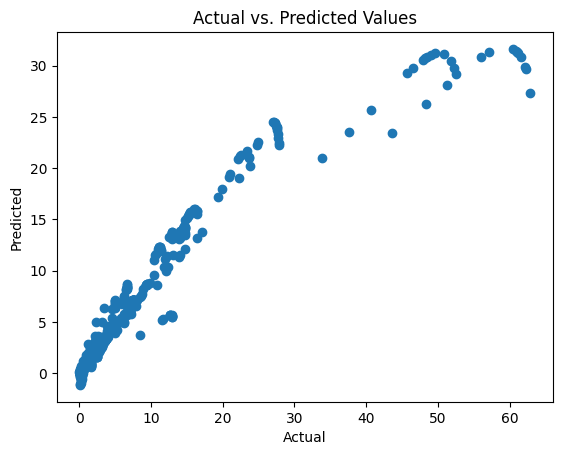

In [11]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()
